## 1. Data Preprocessing
### Label Encoding for Demographics and Preference

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv (r"C:\Users\User\Documents\PedCrosswalkUsageBehavior.csv")

# Encode Demographic Variables
label_encoder = LabelEncoder()

# Assuming 'D1', 'D2', 'D3' are categorical, apply label encoding
df['D1_encoded'] = label_encoder.fit_transform(df['D1'])
df['D2_encoded'] = label_encoder.fit_transform(df['D2'])
df['D3_encoded'] = label_encoder.fit_transform(df['D3'])

# Encode 'Preference'
df['Preference_encoded'] = df['Preference'].map({'Yes': 0, 'No': 1}) #Here respondensts with "No" response was the primary target


#### NB: D1: Gender, D2: Age (years), D3: Crosswalk Usage Frequency, Preference Crosswalk Usage Preference

## 2. Descriptive Statistics
### Demographic Variables (Count and Percentage)

In [5]:
import pandas as pd

# Define a function to return demographic data in tabular form
def demographic_summary_df(df, column, variable_name, value_labels=None):
    counts = df[column].value_counts()
    percentages = df[column].value_counts(normalize=True) * 100

    rows = []
    for value, count in counts.items():
        label = value_labels[value] if value_labels else value
        percentage = percentages[value]
        rows.append([variable_name, label, f"{count} ({percentage:.2f})"])

    return pd.DataFrame(rows, columns=['Variables', 'Category', 'N (%)'])

# Example labels for demographic variables
gender_labels = {0: 'Female', 1: 'Male'}
age_labels = {0: '<20', 1: '20–40', 2: '40–60', 3: '>60'}
crosswalk_labels = {
    0: 'Very rarely',
    1: 'Once or twice a month',
    2: 'Once or twice a week',
    3: 'Everyday',
    4: 'More than once a day'
}

# Generate summaries for each demographic variable
gender_summary_df = demographic_summary_df(df, 'D1_encoded', 'Gender', gender_labels)
age_summary_df = demographic_summary_df(df, 'D2_encoded', 'Age (years)', age_labels)
crosswalk_summary_df = demographic_summary_df(df, 'D3_encoded', 'Crosswalk Usage Frequency', crosswalk_labels)

# Concatenate the results into a single dataframe
demographic_summary_table = pd.concat([gender_summary_df, age_summary_df, crosswalk_summary_df], ignore_index=True)

# Display the result
print(demographic_summary_table)


                    Variables               Category        N (%)
0                      Gender                   Male  619 (90.76)
1                      Gender                 Female    63 (9.24)
2                 Age (years)                    <20  644 (94.43)
3                 Age (years)                    >60    17 (2.49)
4                 Age (years)                  20–40    16 (2.35)
5                 Age (years)                  40–60     5 (0.73)
6   Crosswalk Usage Frequency               Everyday  341 (50.00)
7   Crosswalk Usage Frequency            Very rarely  156 (22.87)
8   Crosswalk Usage Frequency  Once or twice a month   87 (12.76)
9   Crosswalk Usage Frequency   More than once a day   71 (10.41)
10  Crosswalk Usage Frequency   Once or twice a week    27 (3.96)


## 3. Pie Chart for Preference

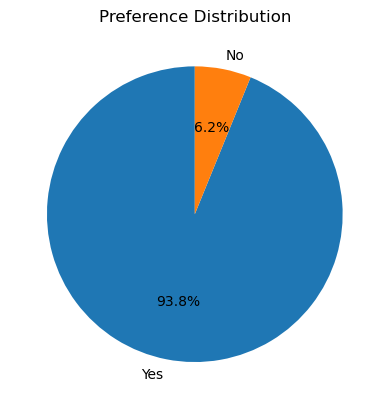

In [7]:
import matplotlib.pyplot as plt

# Plot pie chart for 'Preference'
preference_counts = df['Preference_encoded'].value_counts()
plt.pie(preference_counts, labels=['Yes', 'No'], autopct='%1.1f%%', startangle=90)
plt.title('Preference Distribution')
plt.show()


## 4. Descriptive Stats for Likert Scale Variables (V1-V8)
### Mean and Standard Deviation

In [9]:
import pandas as pd
import pingouin as pg  # To calculate Cronbach's alpha

# Define the labels for each variable (V1 to V8)
likert_labels = [
    "V1: Crosswalk usage is time-consuming",
    "V2: Absence of guard rails on median",
    "V3: Unsuitability of crosswalk location",
    "V4: Feel unsafe to cross directly without crosswalk",
    "V5: Inadequate marking and sign to locate crosswalk",
    "V6: Poor entry access to crosswalk",
    "V7: Difficulty crossing roads using crosswalk",
    "V8: Inadequate lighting at night near crosswalk"
]

# Calculate mean and standard deviation for Likert scale variables
likert_vars = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']
descriptive_stats = df[likert_vars].agg(['mean', 'std']).T

# Round mean and standard deviation to 2 decimal places
descriptive_stats['mean'] = descriptive_stats['mean'].round(2)
descriptive_stats['std'] = descriptive_stats['std'].round(2)

# Add the labels as a new column
descriptive_stats['Variables'] = likert_labels

# Reorder the columns to match the desired format
descriptive_stats = descriptive_stats[['Variables', 'mean', 'std']]
descriptive_stats.columns = ['Variables', 'Mean', 'Standard Deviation']

# Calculate Cronbach's alpha for the Likert scale items
cronbach_alpha = pg.cronbach_alpha(df[likert_vars])[0]

# Convert to DataFrame for presentation
table_3 = descriptive_stats.reset_index(drop=True)

# Print the formatted table
print(table_3.to_string(index=False))
print(f"\nCronbach's alpha = {cronbach_alpha:.3f}.")


                                          Variables  Mean  Standard Deviation
              V1: Crosswalk usage is time-consuming  3.17                1.09
               V2: Absence of guard rails on median  3.74                1.26
            V3: Unsuitability of crosswalk location  3.57                1.15
V4: Feel unsafe to cross directly without crosswalk  3.95                1.39
V5: Inadequate marking and sign to locate crosswalk  3.74                1.00
                 V6: Poor entry access to crosswalk  3.94                1.05
      V7: Difficulty crossing roads using crosswalk  3.97                1.09
    V8: Inadequate lighting at night near crosswalk  4.11                1.01

Cronbach's alpha = 0.871.


#### Cronbach's alpha of the data is 0.871 which is more than standard value 0.8

### Spearman's Correlation Test

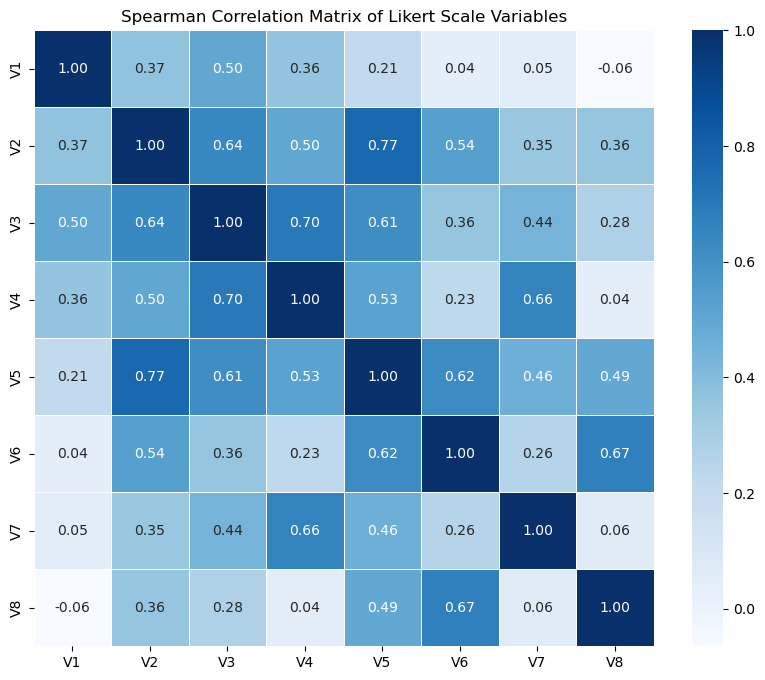

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of Likert scale variables
likert_vars = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']

# Compute the Spearman correlation matrix
spearman_corr = df[likert_vars].corr(method='spearman')

# Plot the Spearman correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix of Likert Scale Variables')
plt.show()


#### Spearman's correlation test was performed between the independent variables where an absolute correlation coefficient >0.8 among two or more predictors indicates the presence of multicollinearity. The correlation matrix show that none of the values of the correlation coefficient is above 0.8, meaning there is no multicollinearity between the eight independent variables, and are distinct and independent of each other.

## 5. Machine Learning Models (CART, RF, XGBoost)
### Stratified Train-Test Split

In [20]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, f1_score, matthews_corrcoef
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd

# Features and target
X = df[likert_vars]
y = df['Preference_encoded']

# Train-test split using stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### Model Training and Evaluation

In [22]:
# Initialize models
models = {
    'CART': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Train and evaluate each model
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict for training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Confusion matrices
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)
    print(f"{model_name} Confusion Matrix - Training:\n", cm_train)
    print(f"{model_name} Confusion Matrix - Testing:\n", cm_test)
    
    # Evaluation Metrics (multiplied by 100 for percentage format)
    f1 = round(f1_score(y_test, y_test_pred) * 100, 2)
    accuracy = round(accuracy_score(y_test, y_test_pred) * 100, 2)
    sensitivity = round((cm_test[1,1] / (cm_test[1,0] + cm_test[1,1])) * 100, 2)  # Recall
    precision = round((cm_test[1,1] / (cm_test[0,1] + cm_test[1,1])) * 100, 2)
    specificity = round((cm_test[0,0] / (cm_test[0,0] + cm_test[0,1])) * 100, 2)
    fpr = round((1 - specificity / 100) * 100, 2)  # FPR as a percentage
    tnr = specificity  # TNR is the same as specificity in percentage
    mcc = round(matthews_corrcoef(y_test, y_test_pred) * 100, 2)
    auroc = round(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) * 100, 2)
    
    # Store results
    results.append([model_name, f1, accuracy, sensitivity, precision, specificity, fpr, tnr, mcc, auroc])

# Create a dataframe to display results
results_df = pd.DataFrame(results, columns=['Model', 'F1 Score (%)', 'Accuracy (%)', 'Sensitivity (%)', 'Precision (%)', 'Specificity (%)', 'FPR (%)', 'TNR (%)', 'MCC (%)', 'AUROC (%)'])
print(results_df)


CART Confusion Matrix - Training:
 [[447   1]
 [  1  28]]
CART Confusion Matrix - Testing:
 [[189   3]
 [  1  12]]
RandomForest Confusion Matrix - Training:
 [[447   1]
 [  1  28]]
RandomForest Confusion Matrix - Testing:
 [[192   0]
 [  1  12]]
XGBoost Confusion Matrix - Training:
 [[446   2]
 [  2  27]]
XGBoost Confusion Matrix - Testing:
 [[191   1]
 [  1  12]]
          Model  F1 Score (%)  Accuracy (%)  Sensitivity (%)  Precision (%)  \
0          CART         85.71         98.05            92.31          80.00   
1  RandomForest         96.00         99.51            92.31         100.00   
2       XGBoost         92.31         99.02            92.31          92.31   

   Specificity (%)  FPR (%)  TNR (%)  MCC (%)  AUROC (%)  
0            98.44     1.56    98.44    84.92      95.37  
1           100.00     0.00   100.00    95.83      99.02  
2            99.48     0.52    99.48    91.79      99.28  


#### Based on MCC, RF model performs the best on test set

## 6. Feature Importance 

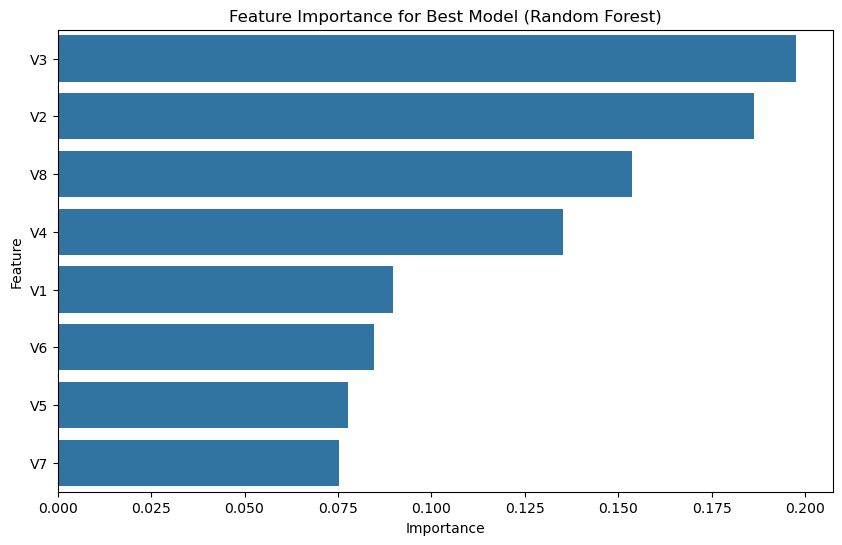

In [25]:
import seaborn as sns

# RandomForest is the best based on MCC
best_model = models['RandomForest']

# Extract feature importances
importances = best_model.feature_importances_
feature_names = X.columns

# Create a sorted dataframe of importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Best Model (Random Forest)')
plt.show()
